In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import stochnewton

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_classification

In [2]:
np.random.seed(42)

$f_i(x) = \log(1 + \exp(-b_i \cdot a_i^T x)) + \frac{\lambda}{2}\|x\|_2^2,\quad b_i = \pm 1$

Константа Липшица для градиентов $L_i = \frac{1}{4} \|a_i\|^2$, для Гессианов $H_i = \frac{1}{10} \|a_i\|^3$ 

---

Lipschitzness parameters for gradients, for Hessians

## Importance sampling на неоднородных данных 

---

## Non-uniform data

In [5]:
n_samples, n_features = 500, 5
A, b = make_classification(n_samples=n_samples,
                    n_features=n_features,
                    n_informative=5,
                    n_redundant=0,
                    n_repeated=0,
                    random_state=42)
b = b * 2 - 1
A = A / np.linalg.norm(A, axis=1)[:, None]
A[0] *= 50

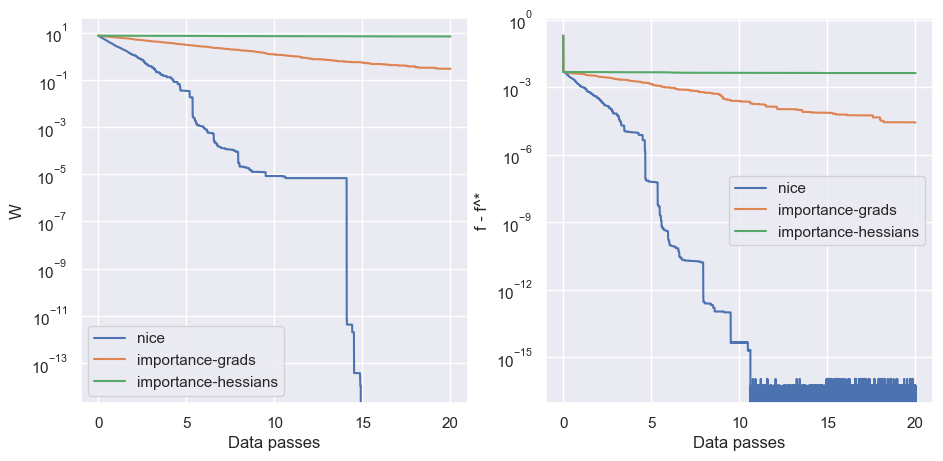

In [6]:
n_epochs = 20
batch_size = 1
n_iterations = n_epochs * n_samples // batch_size
l2 = 1e-2

det = stochnewton.DeterministicNewtonLogReg(A, b, l2=l2)
det.run(n_iterations=20, plot_loss=False)
opt_value = det.calculate_loss()
opt_x = det.x

nice = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
nice.run(n_iterations=n_iterations, batch_size=batch_size, strategy='nice', plot_loss=False)

grad = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
grad.run(n_iterations=n_iterations, batch_size=batch_size, strategy='imp-grad', plot_loss=False)

hess = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
hess.run(n_iterations=n_iterations, batch_size=batch_size, strategy='imp-hess', plot_loss=False)

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         nice.dist_history, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         grad.dist_history, label=f'importance-grads')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         hess.dist_history, label=f'importance-hessians')
plt.xlabel('Data passes')
plt.ylabel('W')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(nice.loss_history) - opt_value, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(grad.loss_history) - opt_value, label=f'importance-grads')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(hess.loss_history) - opt_value, label=f'importance-hessians')
plt.xlabel('Data passes')
plt.ylabel('f - f^*')
plt.yscale('log')
plt.legend()
plt.savefig('importance sampling')
pass

## Различные однородные стратегии

---

## Different uniform strategies

In [7]:
n_samples, n_features = 500, 5
A, b = make_classification(n_samples=n_samples,
                    n_features=n_features,
                    n_informative=n_features,
                    n_redundant=0,
                    n_repeated=0,
                    random_state=42)
b = b * 2 - 1

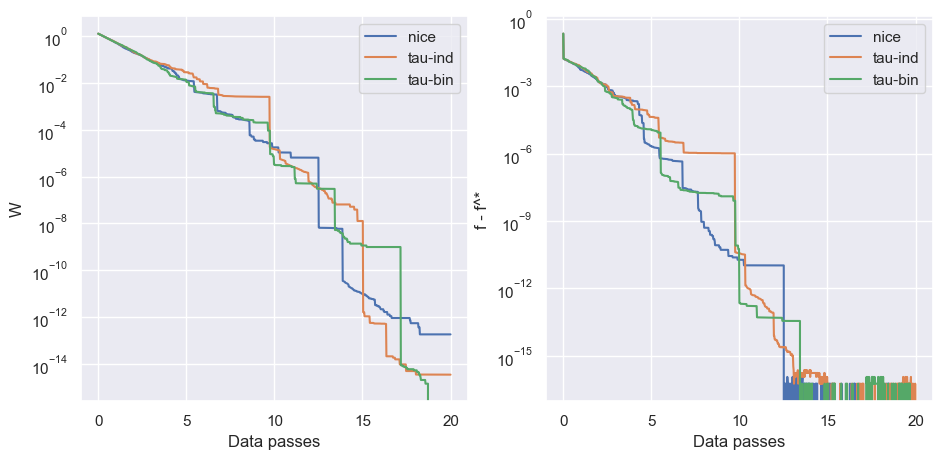

In [8]:
n_epochs = 20
batch_size = 10
n_iterations = n_epochs * n_samples // batch_size
l2 = 1e-2

det = stochnewton.DeterministicNewtonLogReg(A, b, l2=l2)
det.run(n_iterations=20, plot_loss=False)
opt_value = det.calculate_loss()
opt_x = det.x

nice = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
nice.run(n_iterations=n_iterations, batch_size=batch_size, strategy='nice', plot_loss=False)

tau_ind = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
tau_ind.run(n_iterations=n_iterations, batch_size=batch_size, strategy='tau-ind', plot_loss=False)

tau_bin = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
tau_bin.run(n_iterations=n_iterations, batch_size=int(batch_size//0.7), tau_bin_p=0.7, strategy='tau-bin', plot_loss=False)

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         nice.dist_history, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         tau_ind.dist_history, label=f'tau-ind')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         tau_bin.dist_history, label=f'tau-bin')
plt.xlabel('Data passes')
plt.ylabel('W')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(nice.loss_history) - opt_value, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(tau_ind.loss_history) - opt_value, label=f'tau-ind')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(tau_bin.loss_history) - opt_value, label=f'tau-bin')
plt.xlabel('Data passes')
plt.ylabel('f - f^*')
plt.yscale('log')
plt.legend()
plt.savefig('uniform strategies')
pass

## Последовательное обновление

---

## Consecutive updates

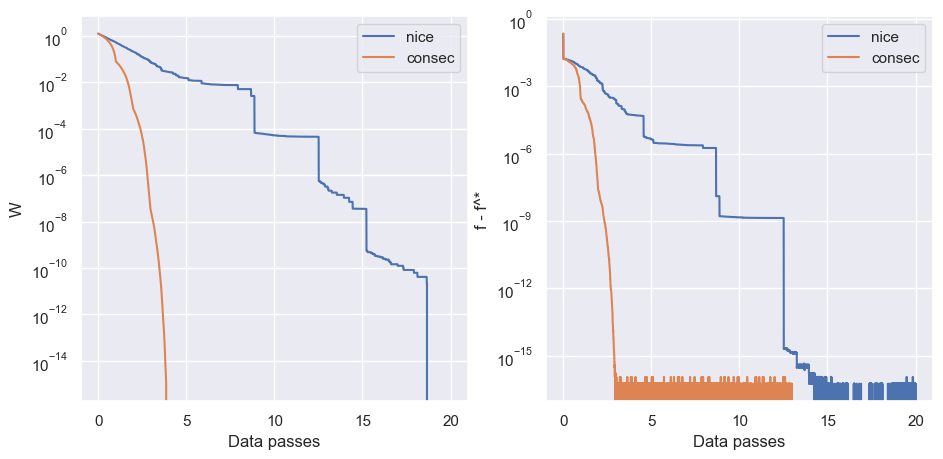

In [10]:
n_epochs = 20
batch_size = 1
n_iterations = n_epochs * n_samples // batch_size
l2 = 1e-2

det = stochnewton.DeterministicNewtonLogReg(A, b, l2=l2)
det.run(n_iterations=20, plot_loss=False)
opt_value = det.calculate_loss()
opt_x = det.x

nice = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
nice.run(n_iterations=n_iterations, batch_size=batch_size, strategy='nice', plot_loss=False)

consec = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
consec.run(n_iterations=n_iterations, batch_size=batch_size, strategy='consec', plot_loss=False)

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         nice.dist_history, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         consec.dist_history, label=f'consec')
plt.xlabel('Data passes')
plt.ylabel('W')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(nice.loss_history) - opt_value, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(consec.loss_history) - opt_value, label=f'consec')
plt.xlabel('Data passes')
plt.ylabel('f - f^*')
plt.yscale('log')
plt.legend()
plt.savefig('consecutive strategy 1')
pass

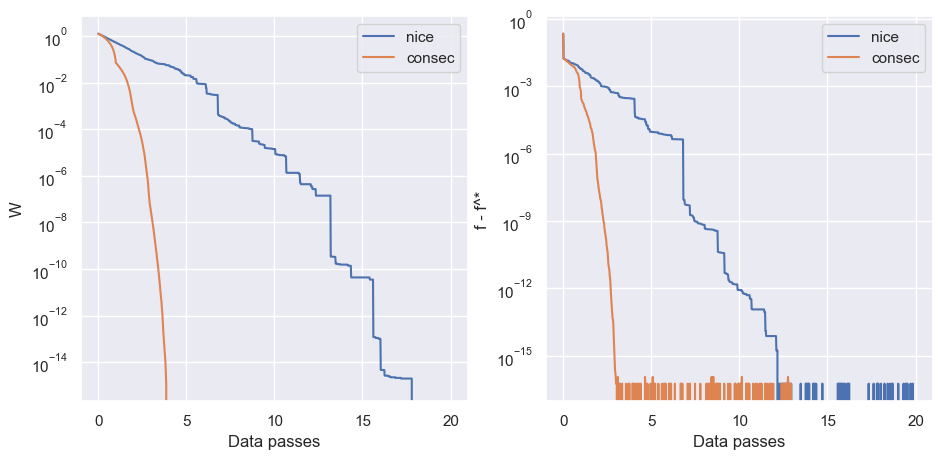

In [11]:
n_epochs = 20
batch_size = 10
n_iterations = n_epochs * n_samples // batch_size
l2 = 1e-2

det = stochnewton.DeterministicNewtonLogReg(A, b, l2=l2)
det.run(n_iterations=20, plot_loss=False)
opt_value = det.calculate_loss()
opt_x = det.x

nice = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
nice.run(n_iterations=n_iterations, batch_size=batch_size, strategy='nice', plot_loss=False)

consec = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
consec.run(n_iterations=n_iterations, batch_size=batch_size, strategy='consec', plot_loss=False)

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         nice.dist_history, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         consec.dist_history, label=f'consec')
plt.xlabel('Data passes')
plt.ylabel('W')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(nice.loss_history) - opt_value, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(consec.loss_history) - opt_value, label=f'consec')
plt.xlabel('Data passes')
plt.ylabel('f - f^*')
plt.yscale('log')
plt.legend()
plt.savefig('consecutive strategy 10')
pass

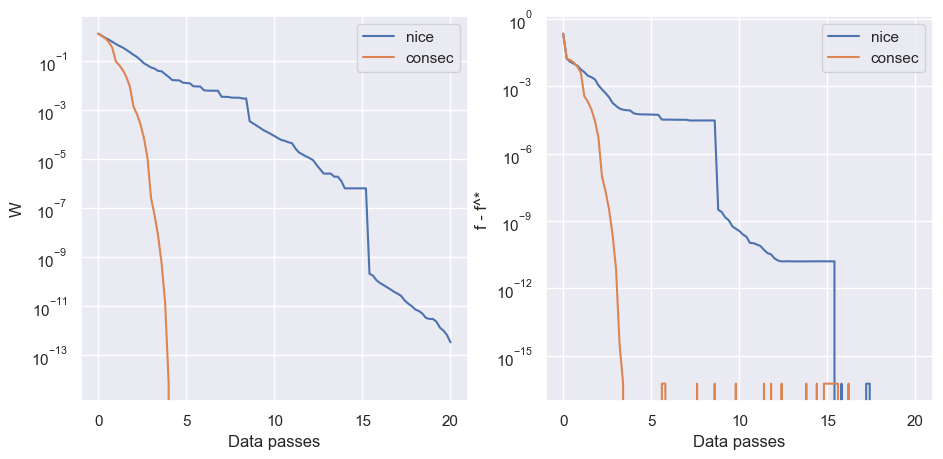

In [12]:
n_epochs = 20
batch_size = 100
n_iterations = n_epochs * n_samples // batch_size
l2 = 1e-2

det = stochnewton.DeterministicNewtonLogReg(A, b, l2=l2)
det.run(n_iterations=20, plot_loss=False)
opt_value = det.calculate_loss()
opt_x = det.x

nice = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
nice.run(n_iterations=n_iterations, batch_size=batch_size, strategy='nice', plot_loss=False)

consec = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value, opt_x=opt_x)
consec.run(n_iterations=n_iterations, batch_size=batch_size, strategy='consec', plot_loss=False)

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         nice.dist_history, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         consec.dist_history, label=f'consec')
plt.xlabel('Data passes')
plt.ylabel('W')
plt.yscale('log')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(nice.loss_history) - opt_value, label=f'nice')
plt.plot(np.linspace(0, n_epochs, n_iterations+1),
         np.array(consec.loss_history) - opt_value, label=f'consec')
plt.xlabel('Data passes')
plt.ylabel('f - f^*')
plt.yscale('log')
plt.legend()
plt.savefig('consecutive strategy 100')
pass